In [1]:
import hepi
import smpl
import hepi.resummino as rs
import numpy as np
import matplotlib.pyplot as plt
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())

~/git/resummino_ug_to_UX_vNLO/


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

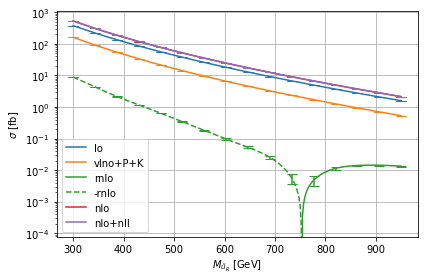

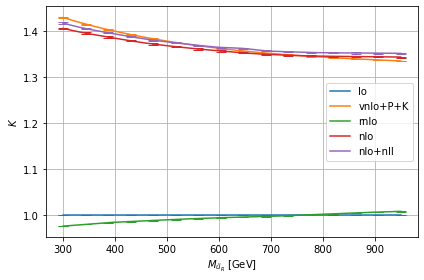

CT14lo 2000002 done
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

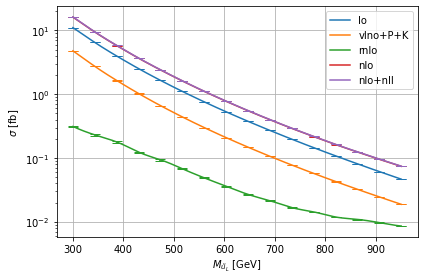

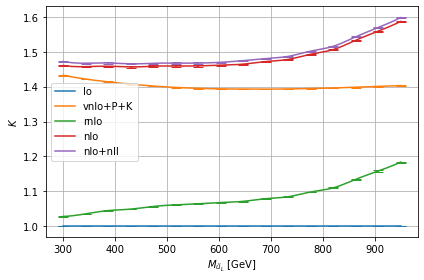

CT14lo 1000002 done
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

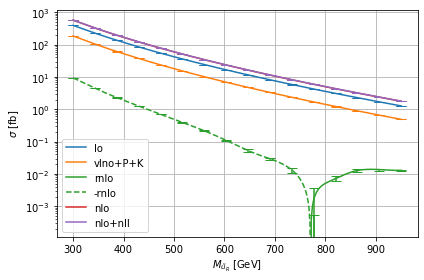

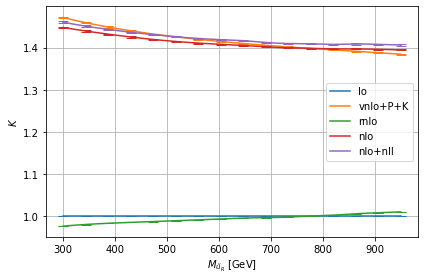

cteq6l1 2000002 done
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

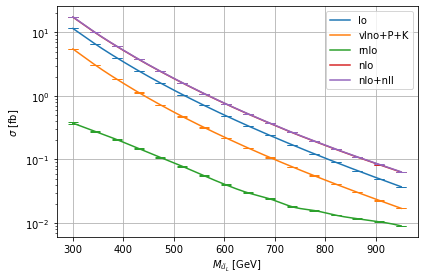

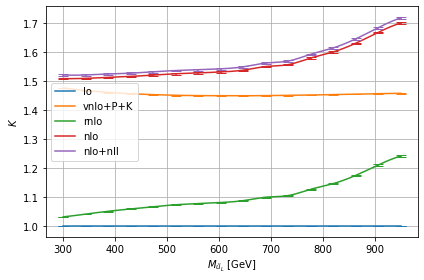

cteq6l1 1000002 done


In [6]:
for pdf in ["CT14lo","cteq6l1"]:
    for p in [2000002,1000002]:
        i = hepi.Input(hepi.Order.NLO_PLUS_NLL,7000,p,1000022,"sps1a1000.in",pdf,pdf,1., 1.)
        li = hepi.mass_scan([i],p, np.linspace(300,950,16),diff_L_R=20)
        dll = rs.run(li)
        hepi.mass_plot(dll,p,"lo",yscale=1000,yaxis="$\sigma$ [fb]")
        #hepi.mass_plot(dll,p,"vnlo",yscale=1000,yaxis="$\sigma$ [fb]")
        hepi.mass_vplot(dll,p,(dll["vnlo"]+dll["p_plus_k"]),yscale=1000,logy=True,yaxis="$\sigma$ [fb]",label="vlno+P+K")
        
        hepi.mass_plot(dll,p,"rnlo",yscale=1000,yaxis="$\sigma$ [fb]")
        #hepi.mass_plot(dll,p,"p_plus_k",yscale=1000,yaxis="$\sigma$ [fb]")
        hepi.mass_plot(dll,p,"nlo",yscale=1000,yaxis="$\sigma$ [fb]")
        hepi.mass_plot(dll,p,"nlo_plus_nll",yscale=1000,yaxis="$\sigma$ [fb]",label="nlo+nll")
        
        plt.savefig("comp_" + pdf + "_" + str(p) + ".pdf")
        smpl.plot.show()
        hepi.mass_plot(dll,p,"K_lo",logy=False,label="lo")
        hepi.mass_vplot(dll,p,((dll["vnlo"]+dll["p_plus_k"]+dll["lo"])/dll["lo"]),logy=False,label="vnlo+P+K")
        #hepi.mass_vplot(dll,p,((dll["vnlo"]+dll["lo"])/dll["lo"]),logy=False,label="$K_\\mathrm{vnlo}$")
        hepi.mass_vplot(dll,p,((dll["rnlo"]+dll["lo"])/dll["lo"]),logy=False,label="rnlo")

        hepi.mass_plot(dll,p,"K_nlo",logy=False,yaxis="$K_\\mathrm{nlo}$",label="nlo")
        hepi.mass_plot(dll,p,"K_nlo_plus_nll",logy=False,yaxis="$K$",label="nlo+nll")
        
        plt.savefig("K_comp_" + pdf + "_" + str(p) + ".pdf")
        smpl.plot.show()

        print(pdf, p, "done" )
    
 